# Unit 3 Homework

This homework will be a bit open ended to give you a bit of practice for your project. We will use a dataset from kaggle and create a linear regression model.

Please read the rubric for this homework - as passing all pytest does not indicate a 100% for this assignment. 

The pytest in this assignment are meant to help guide you. There are no secret tests for this assignment.

Here is the rubric for reference

![rubic_new](./rubric.png)

Here is some code to get you started!

In [14]:
# Import necessary modules
# If you add new modules please also add them to the requirements.txt file
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
import zipfile as zip
import matplotlib.pyplot as plt
# %matplotlib ipympl # You can uncomment this line to have better plots, but this causes pytest warnings. (You can ignore pytest warnings)


The dataset we will be exploring is from https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors?resource=download

Please take some time to read about the data as you will have to answer questions about it for this homework.

In [15]:
with zip.ZipFile('Customer Purchasing Behaviors.zip', 'r') as zp:
    zp.extractall('Customer Purchasing Behaviors')

In the function call below extract the data using pandas

In [16]:
# Note this is in a function so it can be graded. 
def extract_customer_data():
    '''
    Extract the customer dataset based on the path of the data
    that was unzipped. In this case you are hardcoding the file name.

    Return | extracted data from .csv
    '''
    extracted_data = pd.read_csv("Customer Purchasing Behaviors\\Customer Purchasing Behaviors.csv")
    return extracted_data

# This calls the function so you can use the dataset in the rest of your notebook
customer_data_set = extract_customer_data()

One the data is extracted do some analysis on the data. Write your code below, follow up with a summary of your analysis.

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


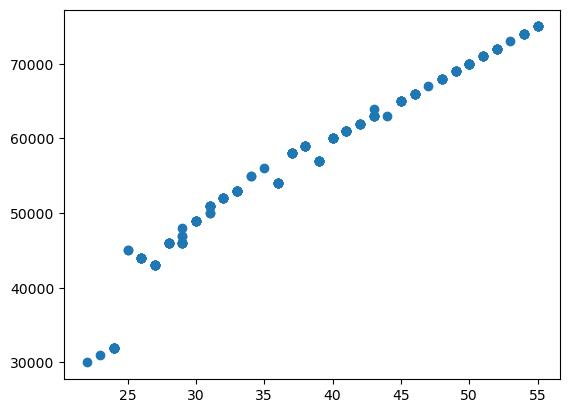

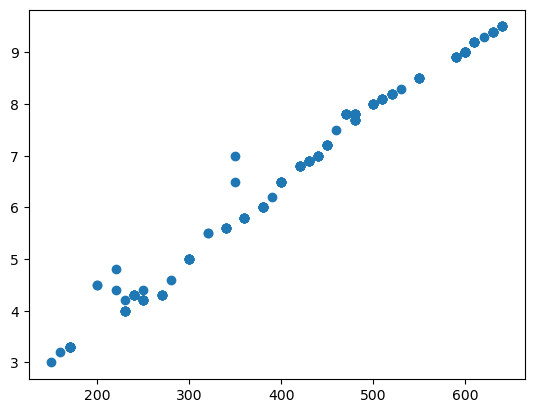

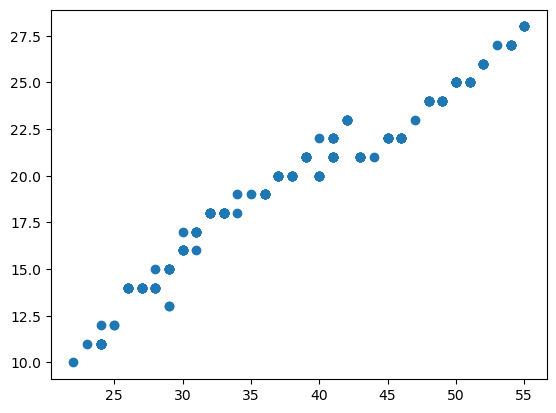

Average Income: 57407.56302521008
Avergae Income for North: 53038.46153846154
Average South Income: 55766.23376623377


In [17]:
# This block is of you to do some analysis on the dataset - see rubric for grading guidelines

# Initial look at the data
print(customer_data_set.head())

# It looks like there is a positive trend here
plt.scatter(x=customer_data_set["age"], y=customer_data_set["annual_income"])
plt.show()

plt.clf()
# There is also a positive linear relationship here
plt.scatter(x=customer_data_set["purchase_amount"], y=customer_data_set["loyalty_score"])
plt.show()

plt.clf()
# This relationship is also positive and linear
plt.scatter(x=customer_data_set["age"], y=customer_data_set["purchase_frequency"])
plt.show()

average_income = np.mean(customer_data_set["annual_income"])
print(f'Average Income: {average_income}')
average_north_income = np.mean(customer_data_set.loc[customer_data_set["region"] == "North"]["annual_income"])
print(f'Avergae Income for North: {average_north_income}')
average_south_income = np.mean(customer_data_set.loc[customer_data_set["region"] == "South"]["annual_income"])
print(f'Average South Income: {average_south_income}')

In [18]:
"""
From some of the plots, we can see that there is a linear relationship between
many of the valiables, specifically [age, annual_income], [purchase_amount, loyalty_score],
and [age, purchase_frequency]

Furthermore, from the annual income averages we can see that the average income
in the North region is lower than the total average and the average for the South
region is higher than in the North, but lower than the total average

"""

'\nFrom some of the plots, we can see that there is a linear relationship between\nmany of the valiables, specifically [age, annual_income], [purchase_amount, loyalty_score],\nand [age, purchase_frequency]\n\nFurthermore, from the annual income averages we can see that the average income\nin the North region is lower than the total average and the average for the South\nregion is higher than in the North, but lower than the total average\n\n'

In this block write a summary of your analysis, do you see any relationships?

<insert summary here>

In the next block separate the "purchase_amount" and "annual_income" columns from the customer dataset. Plot the relationship between the two. Try to match the plot below.

![image.png](./images/plot1.PNG)

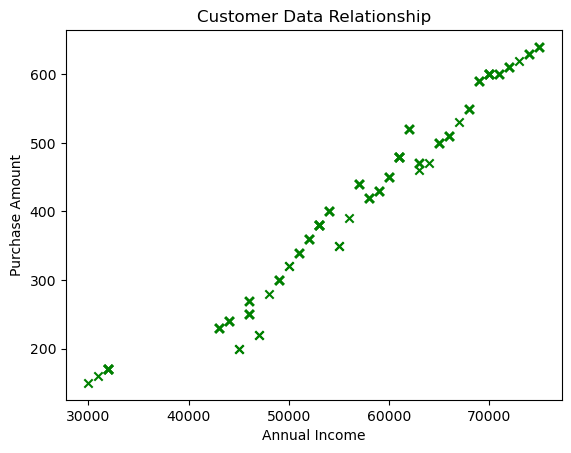

In [19]:
# Match the plot above in this code box
plt.scatter(x=customer_data_set["annual_income"], y=customer_data_set["purchase_amount"], marker='x', color="green")
plt.title("Customer Data Relationship")
plt.xlabel("Annual Income")
plt.ylabel("Purchase Amount")
plt.show()

Wow it looks like there may be a linear relationship - lets try to train a linear regression model. 

Fill out the function below as a template to train a model. Call the function below the function definition to start training your model on the "purchase_amount" and "annual_income". Have the "annual_income" be the x variable and "purchase_amount" be the y variable.

In [27]:
# This is in a function for testing
def train_linear_regression_model(x_data, y_data):
    ''' 
    In this function setup the code to train a model
    that takes in x_data and y_data. 

    parameter: pd.DataFrame | x_data
    parameter: pd.DataFrame | y_data
    return LinearRegression Model
    '''
    x_array = np.array(x_data).reshape(-1, 1)
    y_array = np.array(y_data).reshape(-1, 1)

    model = LinearRegression().fit(x_array, y_array)
    return model

# Call the function above here! Train it on the "annual_income" data and "purchase_amount" data
# Have the return value stored in a variable so we can access our model later. 
# Note the data you pass in may need to be converted to a pandas data frame
trained_model = train_linear_regression_model(customer_data_set["annual_income"], customer_data_set["purchase_amount"])

1

Fill out the function below to return metrics of your model 

In [28]:
# Pytest will only check for formatting 
# Your instructor will manually check for the correct answer. 
def print_model_metrics(model, x_data, y_data):
    '''
    Add the model metrics to this dictionary in the specified order. 

    These model metrics should not be hardcoded, but should be method calls
    from the model you passed in.

    Order:
    - Coefficients
    - Intercepts
    - Score

    parameter: Linear Regression Model | model
    parameter: pd.DataFrame | x_data
    parameter: pd.DataFrame | y_data
    return dict | metrics

    Note in this example we will only have one coefficient and intercept, 
    do not slice the coefficients and interrupts, just return the model 
    attributes. Replace all zeros.
    '''
    metrics = {
        "Coefficients" : model.coef_,
        "Intercepts" : model.intercept_,
        "Score" : model.score(np.array(x_data).reshape(-1, 1), np.array(y_data).reshape(-1, 1)),
    }
    return metrics

# using the template below call the function above with the model you created
# the annual_income data as the x data and the purchase_amount as the y data
# Note the x_data and y_data passed in must be dataframes
print(print_model_metrics(trained_model, customer_data_set["annual_income"], customer_data_set["purchase_amount"]))

{'Coefficients': array([[0.01208716]]), 'Intercepts': array([-268.26390507]), 'Score': 0.9686662678992661}


In the block below plot the line of best fit using the metrics we found from the model. Match the plot below

![image.png](./images/plot2.PNG)

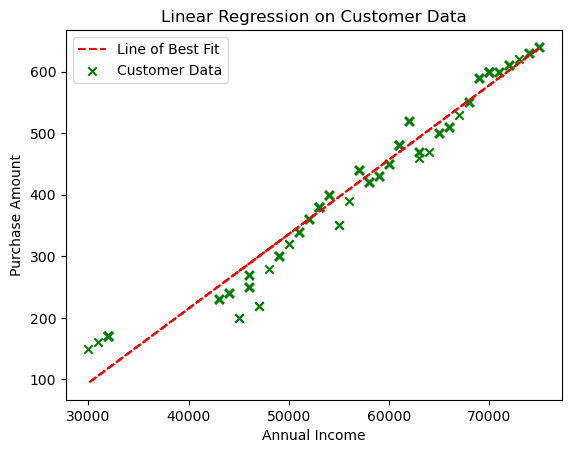

In [38]:
# Create the plot above in code here
metrics = print_model_metrics(trained_model, customer_data_set["annual_income"], customer_data_set["purchase_amount"])
plt.plot(customer_data_set["annual_income"], customer_data_set["annual_income"] * metrics["Coefficients"][0][0] + metrics["Intercepts"], linestyle='dashed', color="red", label="Line of Best Fit")
plt.scatter(customer_data_set["annual_income"], customer_data_set["purchase_amount"], marker='x', color="green", label="Customer Data")
plt.title("Linear Regression on Customer Data")
plt.xlabel("Annual Income")
plt.ylabel("Purchase Amount")
plt.legend(loc="best")
plt.show()


Write a summary below of your model's score and what it might mean also address the questions below:
- What does the score you found mean?
- What are some options we can do to improve our model accuracy (can we increase accuracy over a certain income range?)
- How this data was collected - should we trust the results that we found? Are they representative of the real world?

#See rubric for requirements
Summary:
* The score that we found represents the strength of the correlation between annual income and purchase amount. It is mathematically equal to the covariance of annual income and purchase amount divided by product of their standard deviations. Our score of ~0.96 suggest a strong positive correlation between annual income and purchase amount.
* Linear Regression can be computed exactly, so the line is mathematically optimal for our data set. We could trim our data set of outliers to make it possibly more representative of a larger sample, or limit it to certain ranges to increase local accuracy. It is guarenteed that dividing the data into subsets will increase the overall correlation score with the line of best fit, however we risk overfitting the line because we are limiting the data set. Thus, this methodology will necessarily increse the training accuracy, while potentially decreasing the testing accuracy based on the size of our dataset.
* According to the Kaggle page where the data was gathered, this data is fabricated for educational purposes. In general, this data is probably too good and too smooth to be representative of real-world data. Mathematically, our models can only be as good as the data that we have represents real-world trends and information. If the data is not factual, comprehensive, or accurate, then our model suffers greatly. The more accurate data we have, the higher the statistical guarentee is that our model predicts real-world information.